<a href="https://colab.research.google.com/github/lokesh9460/suicide-data-analysis/blob/master/Suicide_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Calling libraries and packages**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Setting and mounting google drive of the user**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Setting up the path for fetching the dataset**

In [0]:
path = '/content/drive/My Drive/Suicide_model/'
print(os.listdir(path))

['master.csv', 'Untitled0.ipynb', 'countries.csv', 'Suicide_EDA.ipynb']


**Reading the dataset for data processing**

In [0]:
df=pd.read_csv(path+'master.csv')

Displaying the dataset master.csv

In [0]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


creating column array for various values such as "country","year","gender","age_group","suicide_number","population","sui_pop","country_year","hdi","gdp_for_year","gdp_per_capita","generation"

In [0]:
df.columns=["country","year","gender","age_group","suicide_number","population","sui_pop","country_year","hdi","gdp_for_year","gdp_per_capita","generation"]

Deleting the values ("country_year","gdp_for_year","gdp_per_capita","hdi") from dataset df 

In [0]:
df.drop(["country_year","gdp_for_year","gdp_per_capita","hdi"],axis=1,inplace=True)

#Displaying the changed dataset
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Boomers


displaying various unique age groups 

In [0]:
df.age_group.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

**Changing various age groups in terms of ages(int) to child,youth,young adult,early adult,adult,senior**

In [0]:
df["age_group"]=df["age_group"].apply(lambda x: str(x).replace('5-14 years','child') if '5-14 years' in str(x) else str(x))
df["age_group"]=df["age_group"].apply(lambda x: str(x).replace('15-24 years','youth') if '15-24 years' in str(x) else str(x))
df["age_group"]=df["age_group"].apply(lambda x: str(x).replace('25-34 years','young adult') if '25-34 years' in str(x) else str(x))
df["age_group"]=df["age_group"].apply(lambda x: str(x).replace('35-54 years','early adult') if '35-54 years' in str(x) else str(x))
df["age_group"]=df["age_group"].apply(lambda x: str(x).replace('55-74 years','adult') if '55-74 years' in str(x) else str(x))
df["age_group"]=df["age_group"].apply(lambda x: str(x).replace('75+ years','senior') if '75+ years' in str(x) else str(x))

Displaying the changed dataset from head of the dataset df

In [0]:
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,generation
0,Albania,1987,male,youth,21,312900,6.71,Generation X
1,Albania,1987,male,early adult,16,308000,5.19,Silent
2,Albania,1987,female,youth,14,289700,4.83,Generation X
3,Albania,1987,male,senior,1,21800,4.59,G.I. Generation
4,Albania,1987,male,young adult,9,274300,3.28,Boomers


Displaying the changed dataset from tail of the dataset df

In [0]:
df.tail()

,country,year,gender,age_group,suicide_number,population,sui_pop,generation
27815,Uzbekistan,2014,female,early adult,107,3620833,2.96,Generation X
27816,Uzbekistan,2014,female,senior,9,348465,2.58,Silent
27817,Uzbekistan,2014,male,child,60,2762158,2.17,Generation Z
27818,Uzbekistan,2014,female,child,44,2631600,1.67,Generation Z
27819,Uzbekistan,2014,female,adult,21,1438935,1.46,Boomers


Dispalying the dataset information by displaying the dataset schema

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_number  27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   sui_pop         27820 non-null  float64
 7   generation      27820 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.7+ MB


Displaying the shape of the dataset

In [0]:
df.shape

(27820, 8)

Displaying the mean,standard deviation,minimum,maximum and other values of different columns 

In [0]:
df.describe()

,year,suicide_number,population,sui_pop
count,27820.000000,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097
std,8.469055,902.047917,3.911779e+06,18.961511
min,1985.000000,0.000000,2.780000e+02,0.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000
50%,2002.000000,25.000000,4.301500e+05,5.990000
75%,2008.000000,131.000000,1.486143e+06,16.620000
max,2016.000000,22338.000000,4.380521e+07,224.970000


Dispalying the sum of null values of various columns 

In [0]:
df.isnull().sum()

country           0
year              0
gender            0
age_group         0
suicide_number    0
population        0
sui_pop           0
generation        0
dtype: int64

Sorting the dataset by suicide number and age group in descending order 

In [0]:
df=df.sort_values(by=["suicide_number","age_group"],ascending=False)

#Finding out the rank
df['rank']=tuple(zip(df.suicide_number,df.age_group))

#grouping the rank by suicide number
df['rank']=df.groupby('suicide_number',sort=False)['rank'].apply(lambda x:pd.Series(pd.factorize(x)[0])).values

#Dispalying the changed dataset
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,generation,rank
20996,Russian Federation,1994,male,early adult,22338,19044200,117.30,Boomers,0
21008,Russian Federation,1995,male,early adult,21706,19249600,112.76,Boomers,0
21080,Russian Federation,2001,male,early adult,21262,21476420,99.00,Boomers,0
21068,Russian Federation,2000,male,early adult,21063,21378098,98.53,Boomers,0
21057,Russian Federation,1999,male,early adult,20705,21016400,98.52,Boomers,0


Resetting the index value in the dataset and displaying the changed dataset

In [0]:
df.reset_index(inplace=True,drop=True)

df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,generation,rank
0,Russian Federation,1994,male,early adult,22338,19044200,117.30,Boomers,0
1,Russian Federation,1995,male,early adult,21706,19249600,112.76,Boomers,0
2,Russian Federation,2001,male,early adult,21262,21476420,99.00,Boomers,0
3,Russian Federation,2000,male,early adult,21063,21378098,98.53,Boomers,0
4,Russian Federation,1999,male,early adult,20705,21016400,98.52,Boomers,0


Displaying the total count of males and females in the datset

In [0]:
df["gender"].value_counts()

male      13910
female    13910
Name: gender, dtype: int64

# ***Plotting a count plot representing number of suicide cases in different countries***

Countplot is a seaborn-specific function which is used to plot the count or frequency distribution of each unique observation in the categorical variable. It is similar to a histogram over a categorical rather than quantitative variable.

Here we plot different countries against suicides number in terms of histogram

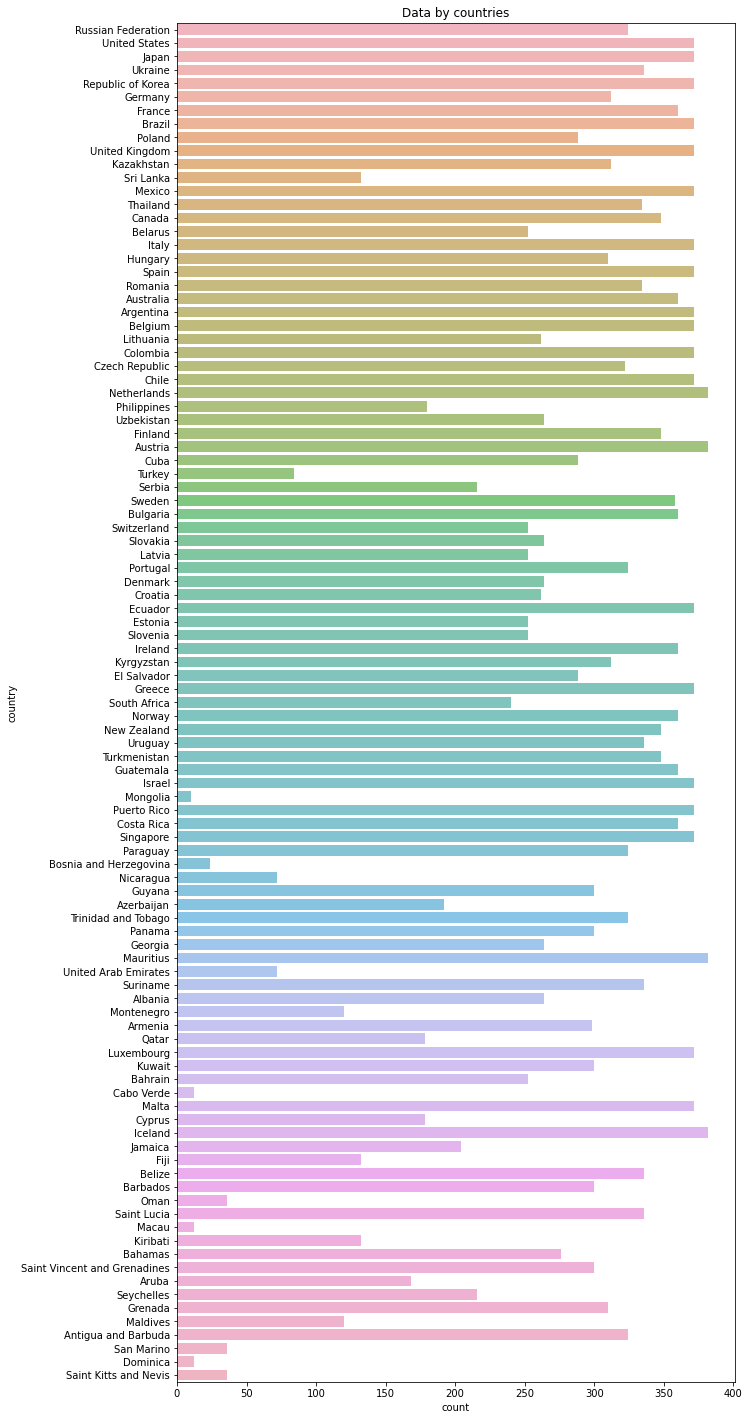

In [0]:
##let's plot bar graph for different countries

alpha=0.7
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=df, alpha=alpha)
plt.title('Data by countries')
plt.show()

# ***Plotting catplot for various age groups and suicide_number for different years for both males and females categorically***

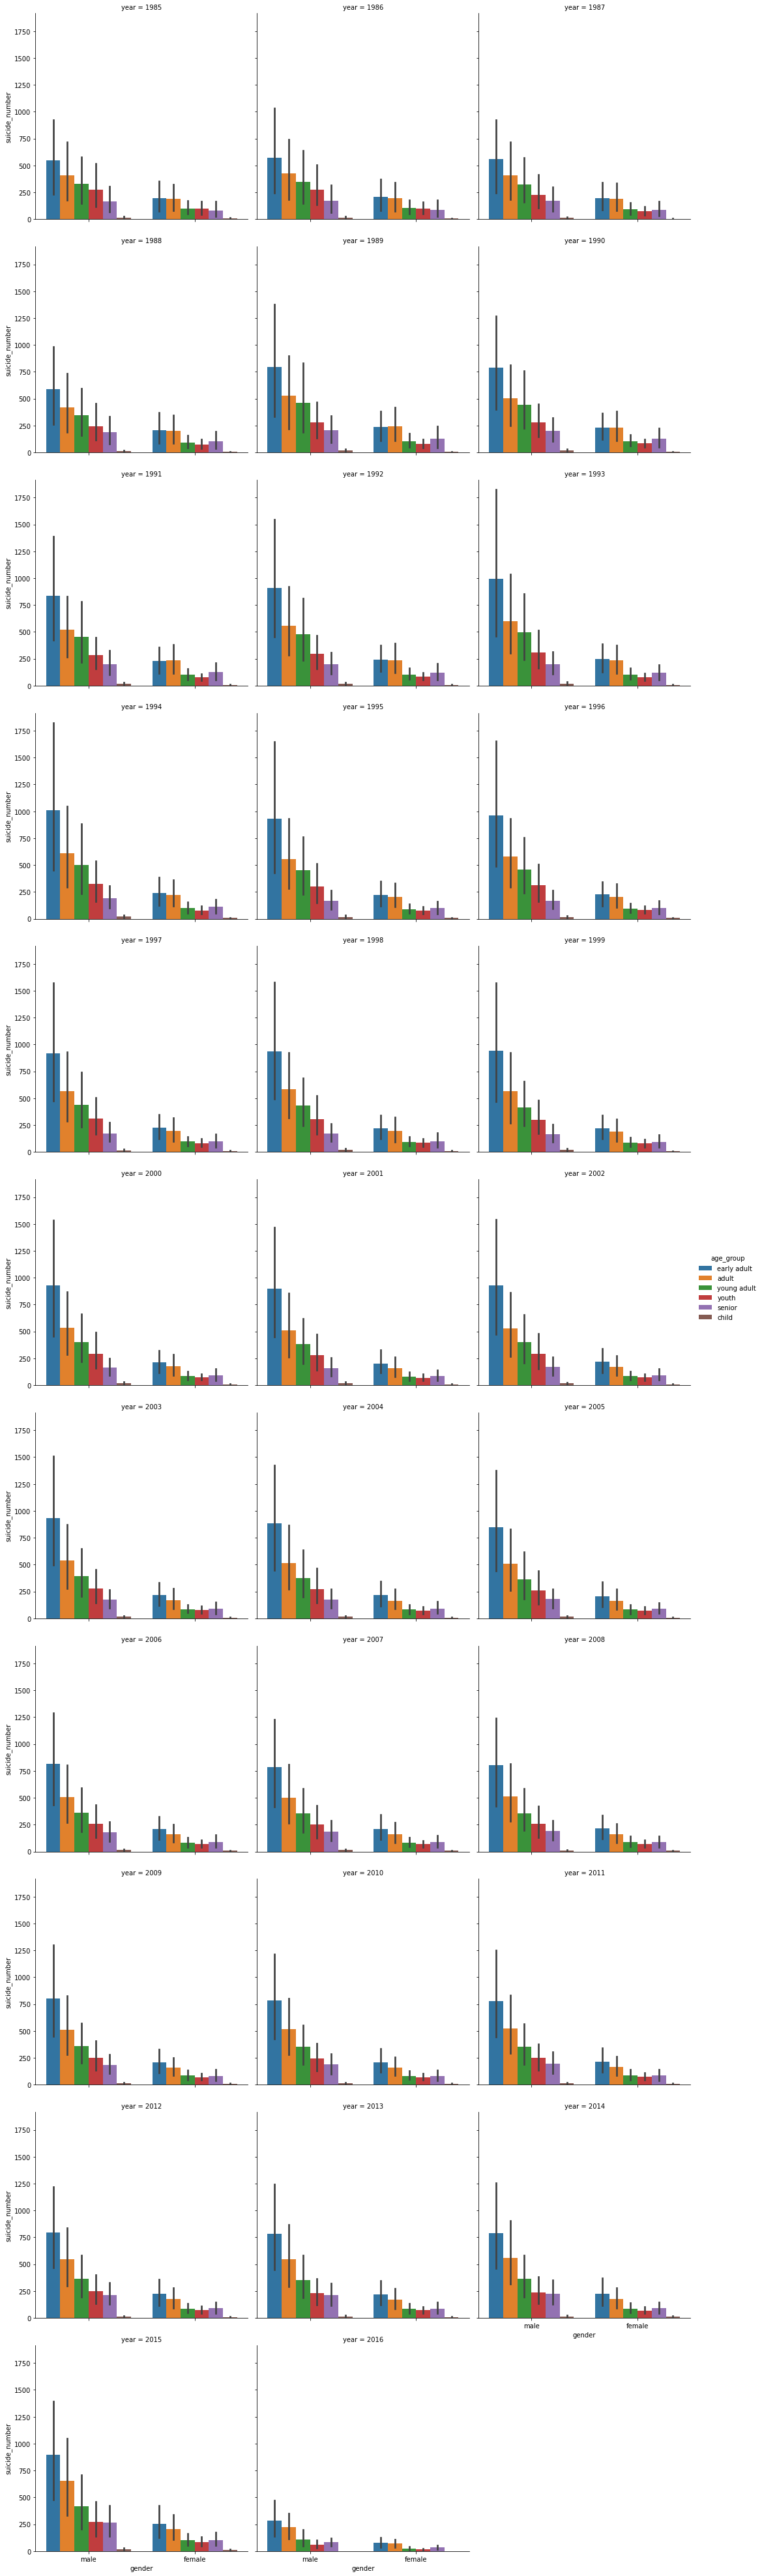

In [0]:
cat_accord_year=sns.catplot('gender','suicide_number',hue='age_group',col='year',data=df,kind='bar',col_wrap=3)

# ***Plotting bar plot of gender against frequency***

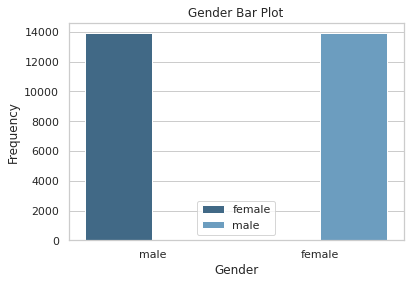

In [0]:
##Gender show bar plot

sns.set(style='whitegrid')
ax=sns.barplot(x=df['gender'].value_counts().index,y=df['gender'].value_counts().values,palette="Blues_d",hue=['female','male'])
plt.legend(loc=8)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Bar Plot')
plt.show()

Displaying the total counts of number of persons in various age groups

In [0]:
df["age_group"].value_counts()

early adult    4642
adult          4642
young adult    4642
senior         4642
youth          4642
child          4610
Name: age_group, dtype: int64

***Plotting bar plot against age group and its frequency***

Text(0.5, 1.0, 'Age_Group Bar Plot')

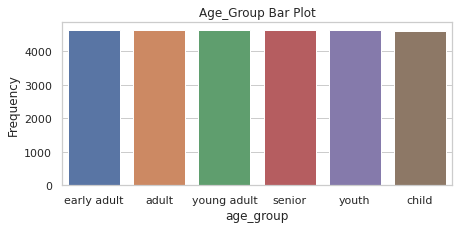

In [0]:
plt.figure(figsize=(7,3))
sns.barplot(x=df['age_group'].value_counts().index,y=df['age_group'].value_counts().values)
plt.xlabel('age_group')
plt.ylabel('Frequency')
plt.title('Age_Group Bar Plot')

Displaying the total number of persons generation wise

In [0]:
df["generation"].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

***Plotting bar plot for generation Vs its frequency***

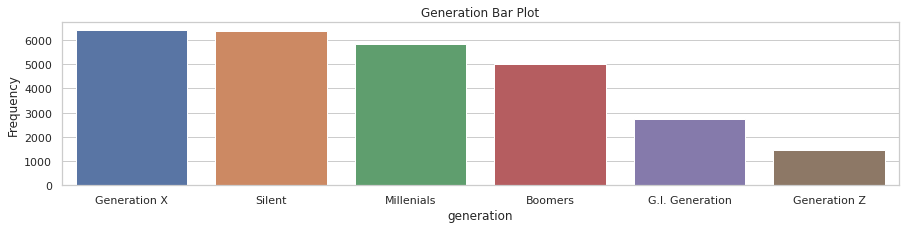

In [0]:
plt.figure(figsize=(15,3))
sns.barplot(x=df['generation'].value_counts().index,y=df['generation'].value_counts().values)
plt.xlabel('generation')
plt.ylabel('Frequency')
plt.title('Generation Bar Plot')
plt.show()

Displaying the total number of unique total counts for various variables

In [0]:
df.nunique()

country             101
year                 32
gender                2
age_group             6
suicide_number     2084
population        25564
sui_pop            5298
generation            6
rank                  6
dtype: int64

***Plotting barplot for both genders for generation wise against suicide numbers***

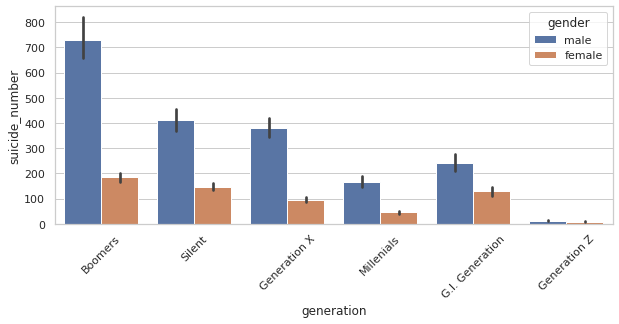

In [0]:
plt.figure(figsize=(10,4))
sns.barplot(x="generation",y="suicide_number",hue="gender",data=df)
plt.xticks(rotation=45)
plt.show()

***Plotting barplot for both genders for age group wise against suicide numbers***

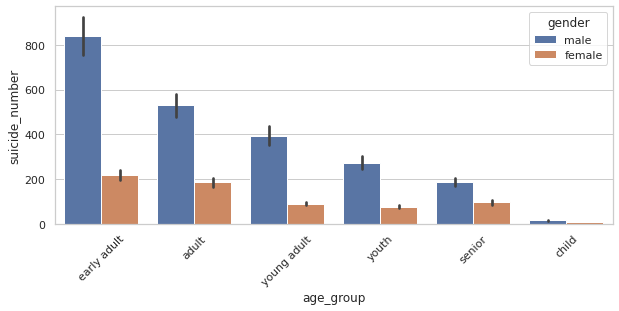

In [0]:
plt.figure(figsize=(10,4))
sns.barplot(x="age_group",y="suicide_number",hue="gender",data=df)
plt.xticks(rotation=45)
plt.show()

***Plotting catplot for gender wise distribution of suicide cases according to age group***

<Figure size 864x504 with 0 Axes>

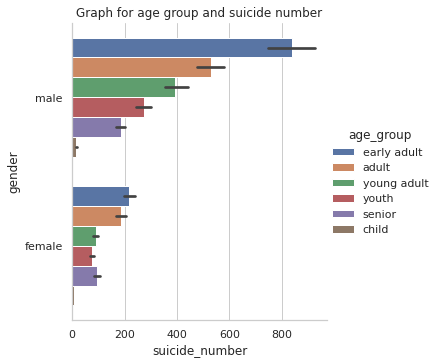

In [0]:
plt.figure(figsize=(12,7))
sns.catplot(y="gender",x="suicide_number",hue="age_group",data=df,kind="bar")
plt.title('Graph for age group and suicide number')
plt.show()

***Plotting catplot for gender wise distribution of suicide cases according to geneations***

<Figure size 720x720 with 0 Axes>

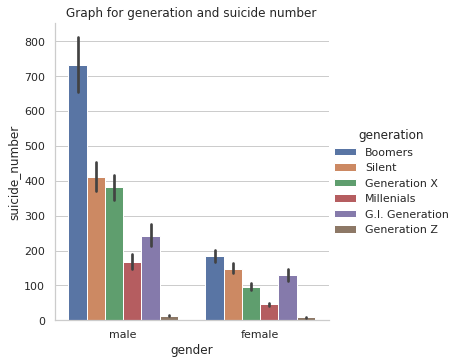

In [0]:
plt.figure(figsize=(10,10))
sns.catplot(x="gender",y="suicide_number",hue="generation",data=df,kind="bar")
plt.title('Graph for generation and suicide number')
plt.show()

***Plotting subplots in form of barplots for various age groups representing proportion of gender and age group***

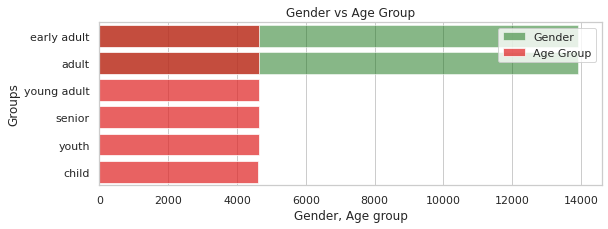

In [0]:
f,ax=plt.subplots(figsize=(9,3))
sns.barplot(x=df['gender'].value_counts().values,y=df['gender'].value_counts().index,alpha=0.5,color='green',label='Gender')
sns.barplot(x=df['age_group'].value_counts().values,y=df['age_group'].value_counts().index,color='red',alpha=0.7,label='Age Group')
ax.legend(loc='upper right',frameon=True)
ax.set(xlabel='Gender, Age group',ylabel='Groups',title="Gender vs Age Group")
plt.show()

***Bar Plot showing no of suicide cases in different countries having suicide cases greater than 600***

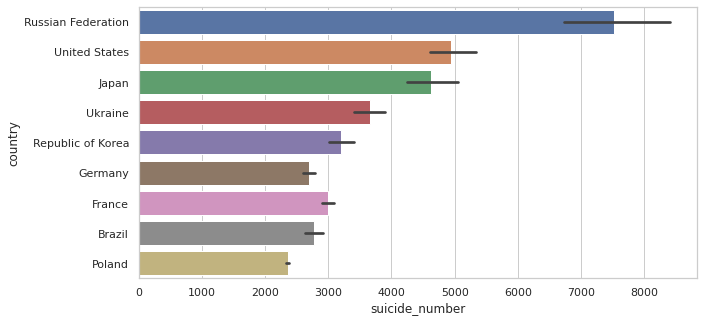

In [0]:
plt.figure(figsize=(10,5))
sns.barplot(df.suicide_number[:600],df.country[:600])
plt.show()

***Plotting join plot between population and no. of suicides***

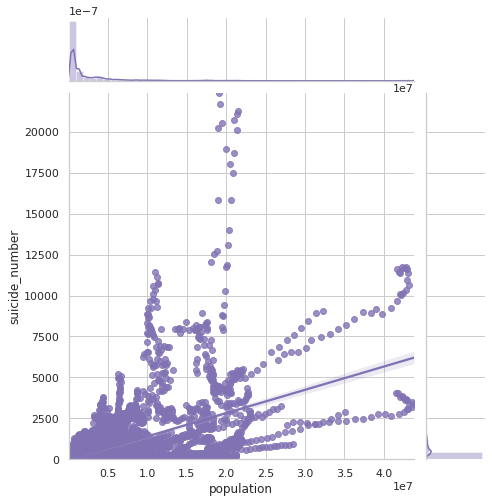

In [0]:
g=sns.jointplot("population","suicide_number",data=df,kind="reg",xlim=(260,43805220),ylim=(0,22340),color="m",height=7)

## ***Plotting kde plot for no. of suicide cases against it frequency***

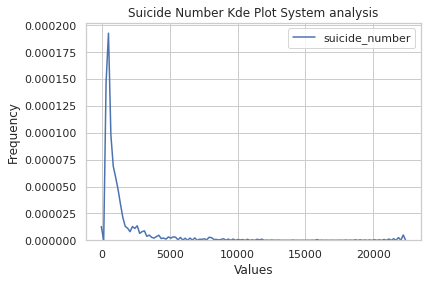

In [0]:
sns.kdeplot(df['suicide_number'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Suicide Number Kde Plot System analysis')
plt.show()

In [0]:
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,generation,rank
0,Russian Federation,1994,male,early adult,22338,19044200,117.30,Boomers,0
1,Russian Federation,1995,male,early adult,21706,19249600,112.76,Boomers,0
2,Russian Federation,2001,male,early adult,21262,21476420,99.00,Boomers,0
3,Russian Federation,2000,male,early adult,21063,21378098,98.53,Boomers,0
4,Russian Federation,1999,male,early adult,20705,21016400,98.52,Boomers,0


***Plotting heat map for the various correlations of columns***

Plot rectangular data as a color-encoded matrix.

dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe.

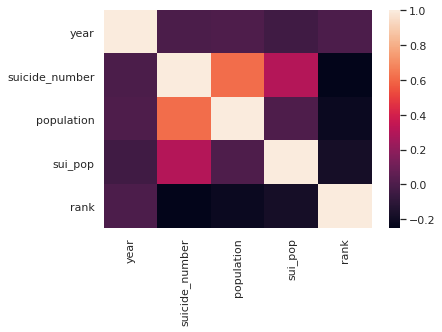

In [0]:
sns.heatmap(df.corr())
plt.show()

***Plotting boxenplot for age group and no. of suicide cases***

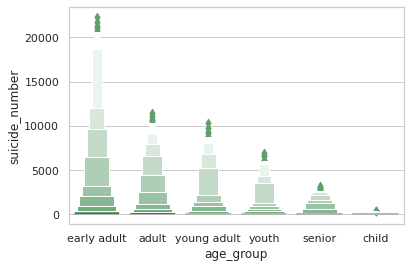

In [0]:
sns.boxenplot(x="age_group",y="suicide_number",color="g",scale="linear",data=df)
plt.show()

***Plotting suicide number to geneder using barplot***

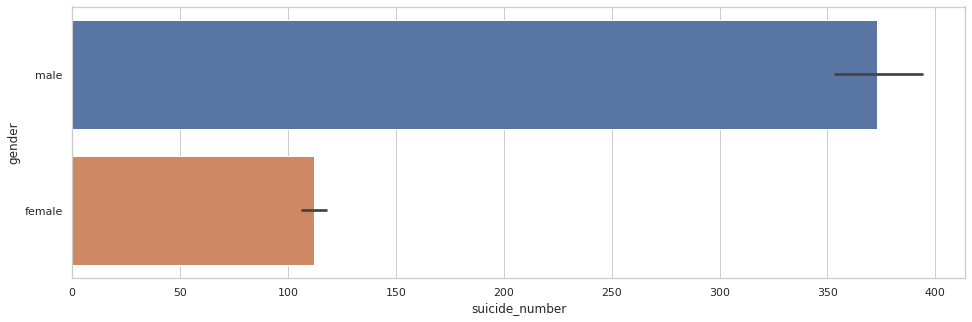

In [0]:
plt.figure(figsize=(16,5))
sns.barplot(df.suicide_number,df.gender)
plt.show()

***Plotting suicide number to age groups using barplot***

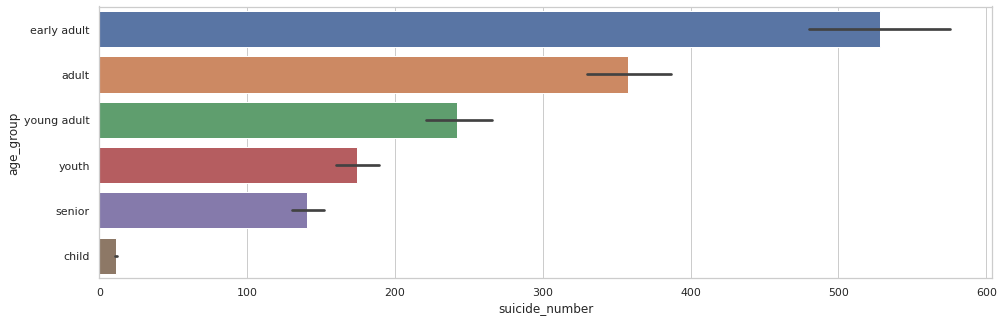

In [0]:
plt.figure(figsize=(16,5))
sns.barplot(df.suicide_number,df.age_group)
plt.show()

***Drawing a pie chart showing % of Age groups proportions***

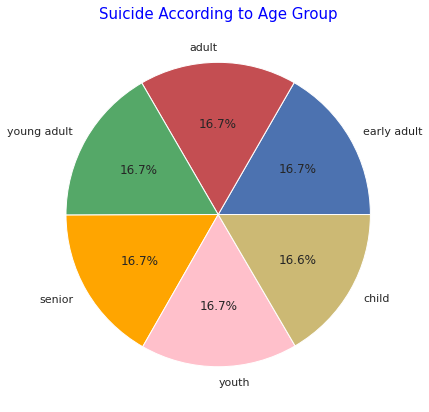

In [0]:
df.age_group.dropna(inplace=True)
labels=df.age_group.value_counts().index
colors=['b','r','g','orange','pink','y']
explode=[0,0,0,0,0,0]
sizes= df.age_group.value_counts().values

plt.figure(0,figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Suicide According to Age Group',color='blue',fontsize=15)
plt.show()

***Plotting suicide number to generations using barplot***

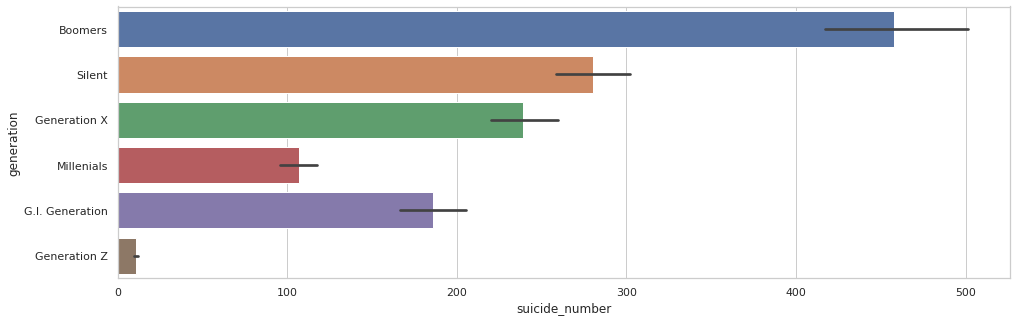

In [0]:
plt.figure(figsize=(16,5))
sns.barplot(df.suicide_number,df.generation)
plt.show()

***Drawing a pie chart showing % of Generation proportions***

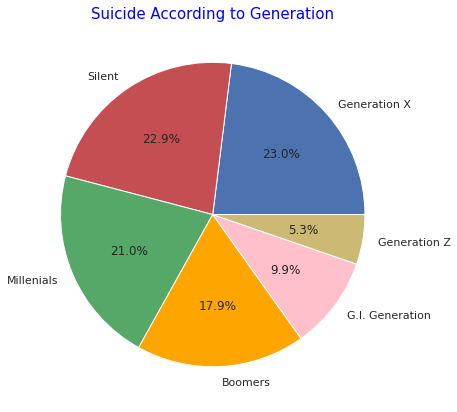

In [0]:
df.age_group.dropna(inplace=True)
labels=df.generation.value_counts().index
colors=['b','r','g','orange','pink','y']
explode=[0,0,0,0,0,0]
sizes= df.generation.value_counts().values

plt.figure(0,figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Suicide According to Generation',color='blue',fontsize=15)
plt.show()

***Plotting pointplot for suicide number vs different years***

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

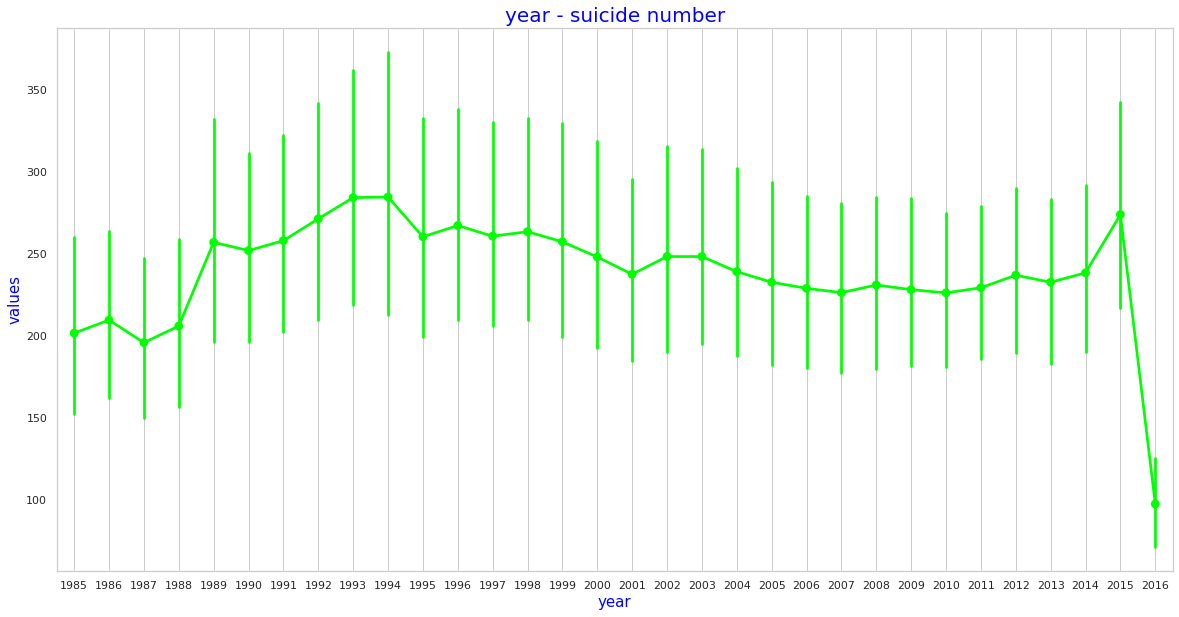

In [0]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='year',y='suicide_number',data=df,color='lime',alpha=0.8)
plt.xlabel('year',fontsize=15,color='blue')
plt.ylabel('values',fontsize=15,color='blue')
plt.title('year - suicide number',fontsize=20,color='blue')
plt.grid()

# ***Generating wordcloud for year 1985***

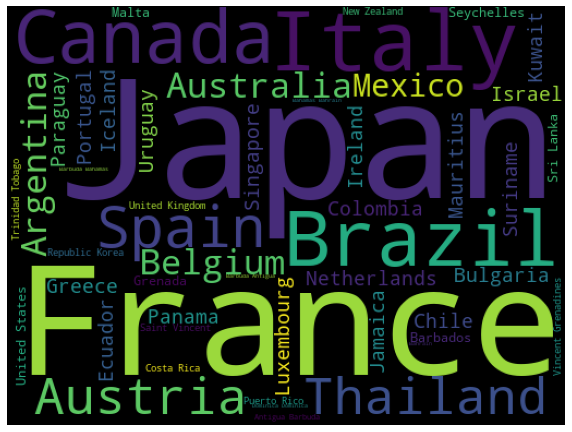

In [0]:
x1985=df.country[df.year==1985]
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(background_color='black',width=512,height=384).generate(" ".join(x1985))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

# ***Generating wordcloud for year 1995***

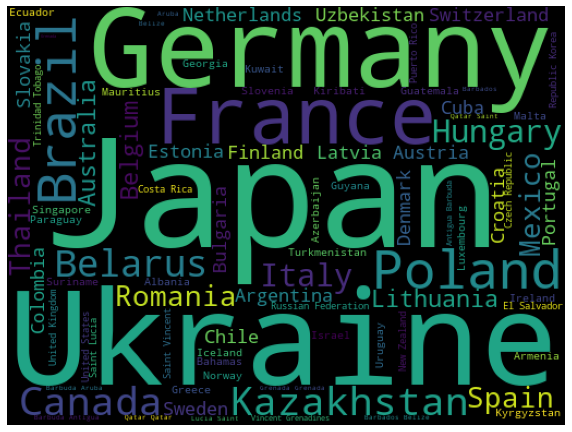

In [0]:
x1995=df.country[df.year==1995]
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(background_color='black',width=512,height=384).generate(" ".join(x1995))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

# ***Generating wordcloud for year 2005***

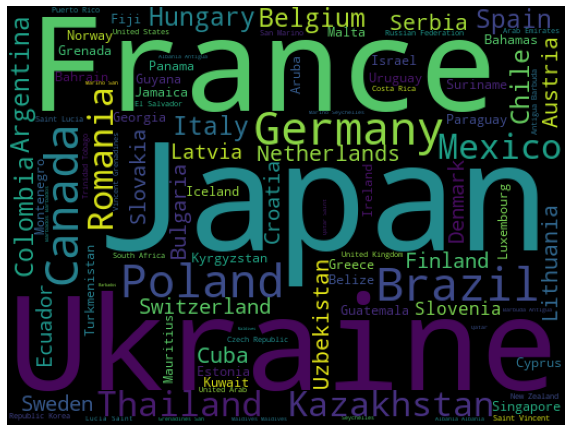

In [0]:
x2005=df.country[df.year==2005]
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(background_color='black',width=512,height=384).generate(" ".join(x2005))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

# ***Generating wordcloud for year 2015***

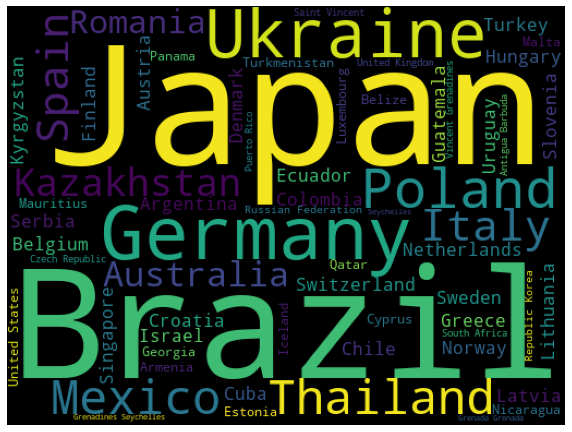

In [0]:
x2015=df.country[df.year==2015]
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(background_color='black',width=512,height=384).generate(" ".join(x2015))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

# **Prediction**

In [0]:
##Displaying various columns of dataset

df.columns


Index(['country', 'year', 'gender', 'age_group', 'suicide_number',
       'population', 'sui_pop', 'generation', 'rank'],
      dtype='object')

In [0]:
##Displaying and calculating correlation 

df.corr()

,year,suicide_number,population,sui_pop,rank
year,1.000000,-0.004546,0.008850,-0.039037,0.002487
suicide_number,-0.004546,1.000000,0.616162,0.306604,-0.249757
population,0.008850,0.616162,1.000000,0.008285,-0.213249
sui_pop,-0.039037,0.306604,0.008285,1.000000,-0.180105
rank,0.002487,-0.249757,-0.213249,-0.180105,1.000000


In [0]:
#Create a new data frame
data=pd.DataFrame(df.iloc[:,4:6])

data.head(3)

,suicide_number,population
0,22338,19044200
1,21706,19249600
2,21262,21476420


***Plotting a scatter plot for population and suicide number***

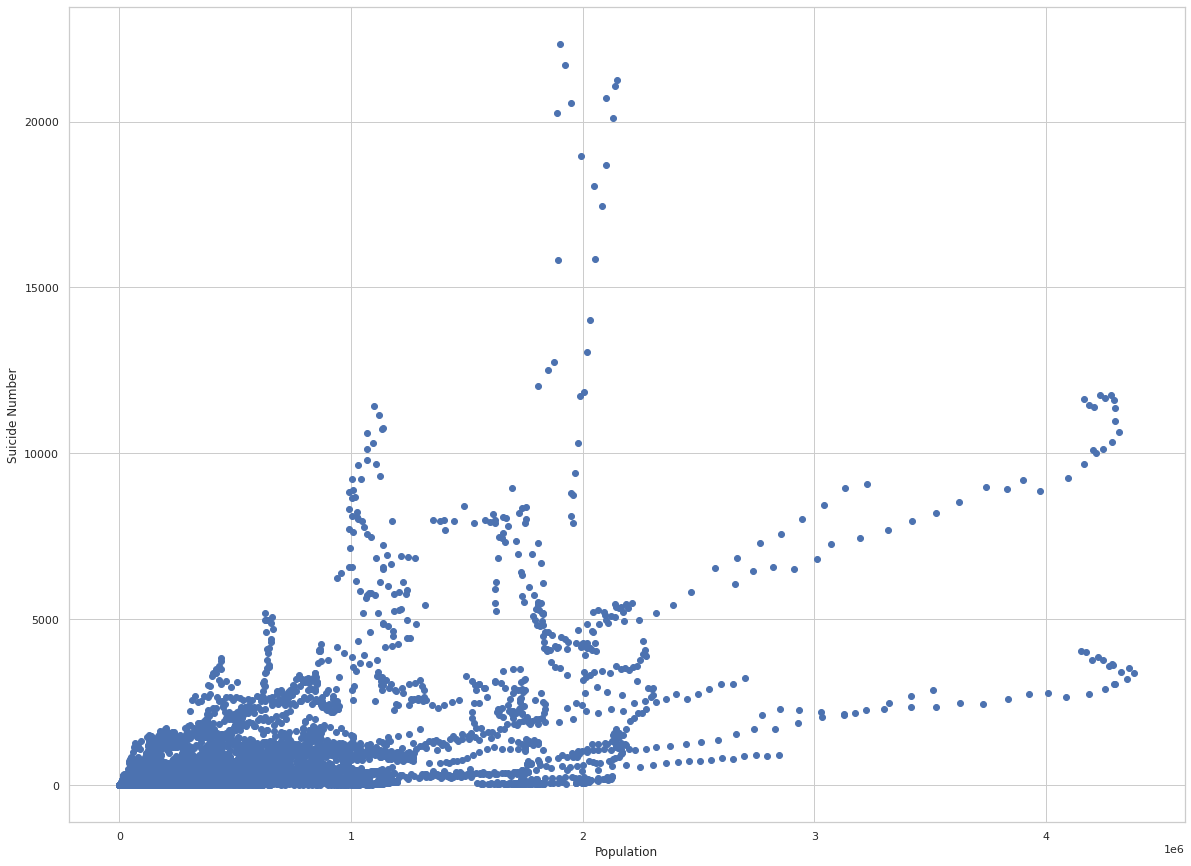

In [0]:
plt.figure(figsize=(20,15))
plt.scatter(data.population*0.1,data.suicide_number)
plt.xlabel("Population")
plt.ylabel("Suicide Number")
plt.show()

# **Linear Regression Model**

In [0]:
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()

x=data.population.values.reshape(-1,1)
y=data.suicide_number.values.reshape(-1,1)

linear_reg.fit(x,y)

b0=linear_reg.intercept_
b1=linear_reg.coef_
print("b0:",b0)   ##linear regression intercept
print("b1:",b1)   ##linear regression coefficient
print("Prediction 5M:",linear_reg.predict([[5000000]]))     ## predicting suicide cases per 5 millions populations
print("Prediction 10M:",linear_reg.predict([[10000000]]))   ## predicting suicide cases per 10 millions populations
print("Prediction 15M:",linear_reg.predict([[15000000]]))   ## predicting suicide cases per 15 millions populations

b0: [-19.54437126]
b1: [[0.00014209]]
Prediction 5M: [[690.88408992]]
Prediction 10M: [[1401.31255109]]
Prediction 15M: [[2111.74101226]]


In [0]:
## Displaying minimum population of the dataset 

df.population.min()

278

In [0]:
## Displaying maximum population of the dataset

df.population.max()

43805214

In [0]:
## Creating array to accept different populations

array=np.array([278,5000000,10000000,15000000,20000000,45000000,80000000]).reshape(-1,1)

##predicting values of no of suicides for the given array

y_head=linear_reg.predict(array)

## Displaying the no of suicides

print("y_head:",y_head)

y_head: [[  -19.50487143]
 [  690.88408992]
 [ 1401.31255109]
 [ 2111.74101226]
 [ 2822.16947343]
 [ 6374.31177929]
 [11347.31100748]]


# ***Plotting scatter plot for the above array for population and predicted suicide number***

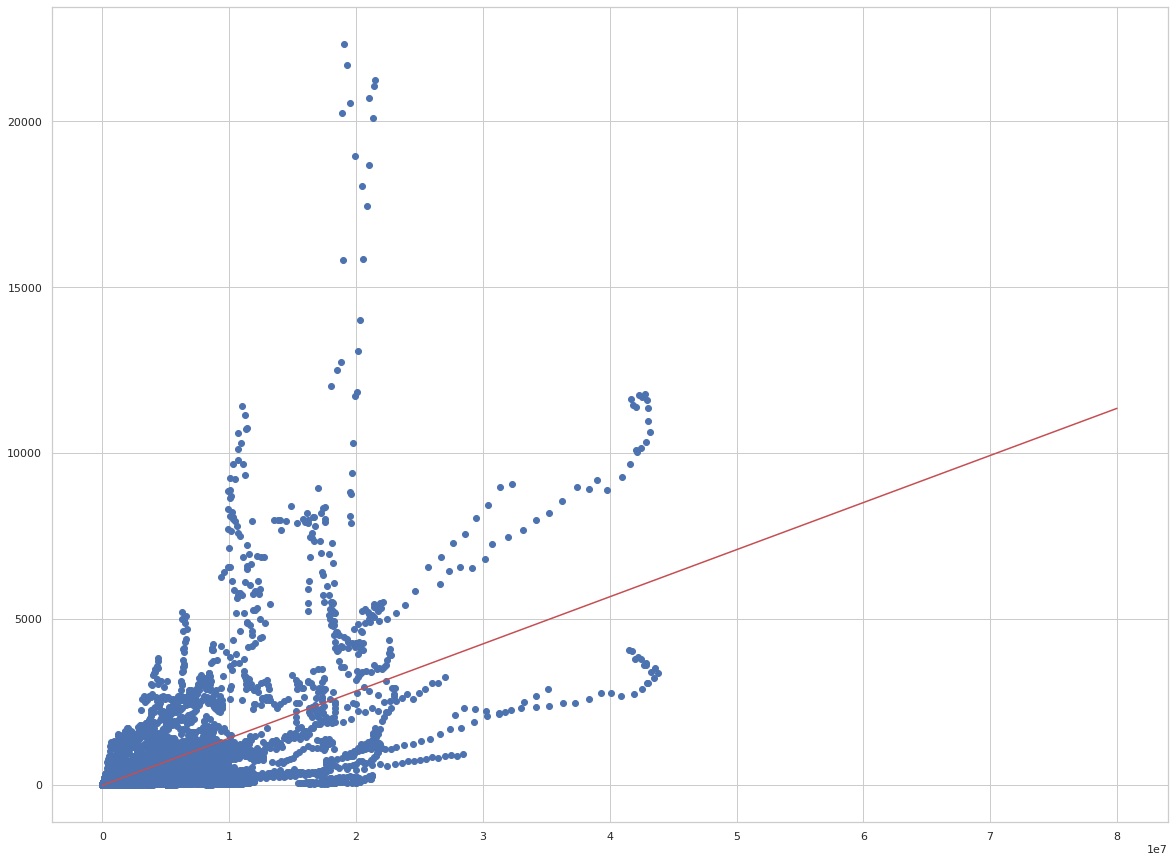

In [0]:
plt.figure(figsize=(20,15))
plt.scatter(x,y)
plt.plot(array,y_head,color='r')
plt.show()